In [1]:
# Import all dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime

In [20]:
# load county data
counties = pd.read_csv('us-counties.csv')
counties.sample(5)

,date,county,state,fips,cases,deaths
650885,10/20/2020,Fauquier,Virginia,51061.0,1049,26
4984,3/19/2020,Lackawanna,Pennsylvania,42069.0,3,0
150181,5/16/2020,Shelby,Ohio,39149.0,34,1
133153,5/10/2020,Crawford,Wisconsin,55023.0,17,0
16914,3/28/2020,Fulton,New York,36035.0,1,0


In [18]:
states = pd.read_csv('us.csv')
states

,date,cases,deaths
0,1/21/2020,1,0
1,1/22/2020,1,0
2,1/23/2020,1,0
3,1/24/2020,2,0
4,1/25/2020,3,0
...,...,...,...
292,11/8/2020,10061070,238048
293,11/9/2020,10191410,238793
294,11/10/2020,10331156,240258
295,11/11/2020,10474016,241689


In [21]:
# find sd county
henn = counties[counties['state']=='Minnesota'] #& (counties['state']=='California')]
henn.sample(3)

,date,county,state,fips,cases,deaths
253960,6/19/2020,Sherburne,Minnesota,27141.0,272,4
355249,7/21/2020,Murray,Minnesota,27101.0,103,0
406663,8/6/2020,Nicollet,Minnesota,27103.0,329,13


In [22]:
henn['datetime'] = pd.to_datetime(henn['date'])


In [23]:
henn.sort_values(by = 'datetime')
henn = henn.reset_index()
henn = henn.groupby(["datetime"]).sum()

# Sort by datetime and reset index
henn.sort_values(by = 'datetime')
henn = henn.reset_index()

# Finish datetime conversion
henn['datetime'] = pd.to_datetime(henn['datetime'])
henn['day'] = henn['datetime'].map(lambda x: x.day)
henn['month'] = henn['datetime'].map(lambda x: x.month)
henn['year'] = henn['datetime'].map(lambda x: x.year)

henn = henn.dropna()
henn = henn
henn.tail(1)

,datetime,index,fips,cases,deaths,day,month,year
251,2020-11-12,63703684,2356569.0,201851,2849,12,11,2020


In [39]:


    
henn['new_deaths'] = henn['new_deaths'].fillna(0)

In [41]:
henn['new_deaths'] = henn['deaths'].diff()

henn.head()

,datetime,index,fips,cases,deaths,day,month,year,new_deaths,adjust
4,2020-03-10,3246,81145.0,3,0,10,3,2020,NaN,0.0
5,2020-03-11,5050,108254.0,5,0,11,3,2020,0.0,0.0
6,2020-03-12,10409,189489.0,9,0,12,3,2020,0.0,0.0
7,2020-03-13,14164,216660.0,14,0,13,3,2020,0.0,0.0
8,2020-03-14,19035,243789.0,21,0,14,3,2020,0.0,0.0


In [ ]:
henn['new_deaths'] = henn['new_deaths'].fillna(0)
henn

In [27]:
henn['adjust'] = henn['deaths'] * .8

In [50]:
def make_models():
    ''' function to run deaths model'''
    # Make the model
    Hen_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = henn[["day", "month", "year"]]
    y_Us = henn[["new_deaths"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    Hen_model.fit(X_train_Us, y_train_Us)
    Hen_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    #election_day = {"day": [20], "month": [11], "year": [2020]}
    predict_weeks = {"day": [20, 27, 4, 11, 18, 25], "month": [11, 11, 12, 12, 12, 12], "year": [2020, 2020, 2020, 2020, 2020, 2020]}
    
    
    predict_weeks = pd.DataFrame(predict_weeks)
    #predict_election = pd.DataFrame(election_day)
    predict_weeks["datetime"] = pd.to_datetime((predict_weeks.year*10000 + predict_weeks.month*100+predict_weeks.day).apply(str),format='%Y%m%d')   


    # Predict with the model
    predictions = Hen_model.predict(predict_weeks[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_weeks["predicted_deaths"] = predictions
    predict_weeks["predicted_deaths"] = predict_weeks['predicted_deaths'].astype('float')
    
    return predict_weeks

make_models()

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,13.125258
1,27,11,2020,2020-11-27,12.757836
2,4,12,2020,2020-12-04,14.363981
3,11,12,2020,2020-12-11,13.996559
4,18,12,2020,2020-12-18,13.629137
5,25,12,2020,2020-12-25,13.261715


In [51]:
mn = make_models()
mn

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,13.125258
1,27,11,2020,2020-11-27,12.757836
2,4,12,2020,2020-12-04,14.363981
3,11,12,2020,2020-12-11,13.996559
4,18,12,2020,2020-12-18,13.629137
5,25,12,2020,2020-12-25,13.261715


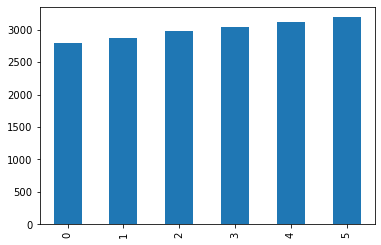

In [49]:
mn['predicted_deaths'].plot.bar()

In [32]:
mn['adjust'] = mn['predicted_deaths'] * .8
mn

,day,month,year,datetime,predicted_deaths,adjust
0,20,11,2020,2020-11-20,2794.495438,2235.596350
1,27,11,2020,2020-11-27,2866.755073,2293.404059
2,4,12,2020,2020-12-04,2971.268857,2377.015085
3,11,12,2020,2020-12-11,3043.528492,2434.822794
4,18,12,2020,2020-12-18,3115.788127,2492.630502
5,25,12,2020,2020-12-25,3188.047763,2550.438210
